<a href="https://colab.research.google.com/github/NanduB26/MAT-421/blob/main/rlbandi1_modH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MAT 421 Module H: Sections 22.4, 22.5, and 22.6 HW

##Numerical Error and Instability

How does step size affect the numerical stability of the explicit Euler method when solving a decaying exponential ODE?
Solve the ODE:
dy/dt = -5y, y(0) = 1

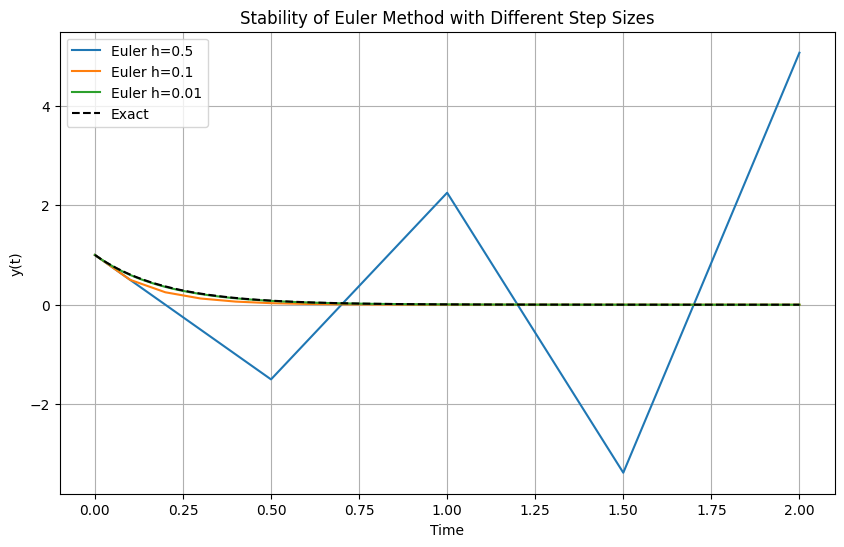

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# define ODE parameters
lambda_ = -5
y0 = 1
T = 2  # end time

# try different step sizes
step_sizes = [0.5, 0.1, 0.01]
t_exact = np.linspace(0, T, 1000)
y_exact = y0 * np.exp(lambda_ * t_exact)

plt.figure(figsize=(10, 6))
for h in step_sizes:
    n_steps = int(T / h)
    t = np.linspace(0, T, n_steps + 1)
    y = np.zeros(n_steps + 1)
    y[0] = y0

    for i in range(n_steps):
        y[i+1] = y[i] + h * lambda_ * y[i]

    plt.plot(t, y, label=f'Euler h={h}')

plt.plot(t_exact, y_exact, 'k--', label='Exact')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Stability of Euler Method with Different Step Sizes')
plt.legend()
plt.grid(True)
plt.show()

How does the implicit (backward) Euler method compare in stability to the explicit Euler method when solving a stiff ODE:

dy/dt = -15y, y(0) = 1


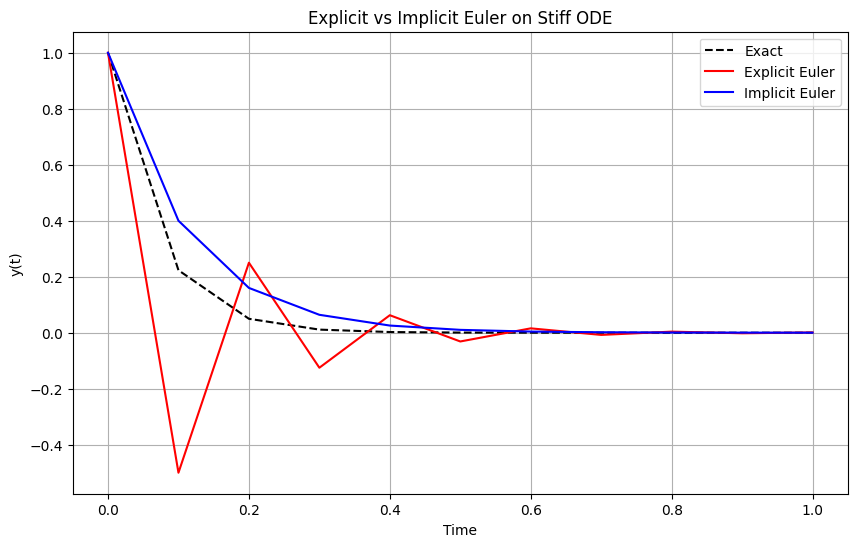

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# ODE parameters
lambda_ = -15
y0 = 1
T = 1
h = 0.1  # Step size
t = np.arange(0, T + h, h)

# allocate arrays
y_explicit = np.zeros_like(t)
y_implicit = np.zeros_like(t)
y_exact = y0 * np.exp(lambda_ * t)

# initial conditions
y_explicit[0] = y0
y_implicit[0] = y0

# Euler integration
for i in range(len(t) - 1):
    # explicit Euler
    y_explicit[i+1] = y_explicit[i] + h * lambda_ * y_explicit[i]

    # implicit Euler
    y_implicit[i+1] = y_implicit[i] / (1 - h * lambda_)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t, y_exact, 'k--', label='Exact')
plt.plot(t, y_explicit, 'r-', label='Explicit Euler')
plt.plot(t, y_implicit, 'b-', label='Implicit Euler')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Explicit vs Implicit Euler on Stiff ODE')
plt.legend()
plt.grid(True)
plt.show()


##Predictor-Corrector Methods

Compare the Heun (predictor-corrector) and RK4 methods in solving the ODE

dy/dt = y+t, y(0) = 1

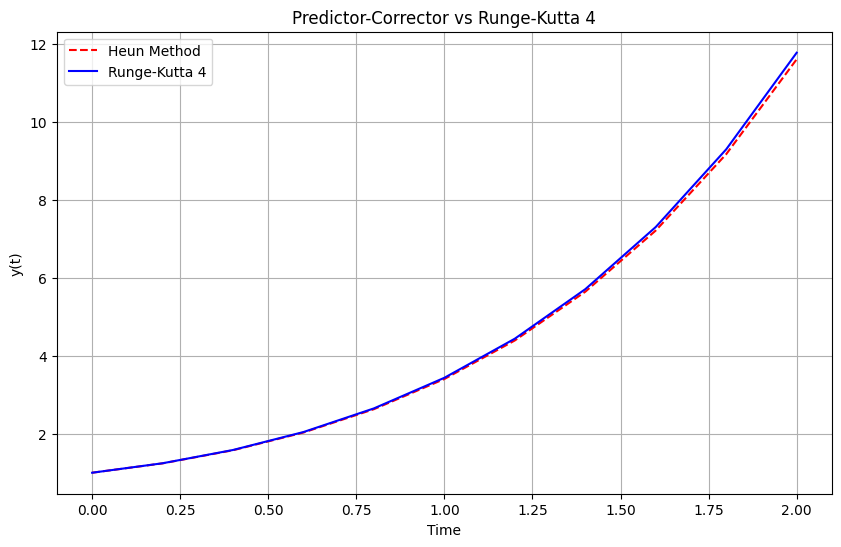

In [3]:
def f(t, y):
    return y + t

# time settings
T = 2
h = 0.2
t = np.arange(0, T + h, h)

# initial value
y0 = 1
y_heun = [y0]
y_rk4 = [y0]

# Heun method (Predictor-Corrector)
for i in range(len(t) - 1):
    y_pred = y_heun[-1] + h * f(t[i], y_heun[-1])
    y_corr = y_heun[-1] + h/2 * (f(t[i], y_heun[-1]) + f(t[i+1], y_pred))
    y_heun.append(y_corr)

# Runge-Kutta 4 method
for i in range(len(t) - 1):
    k1 = f(t[i], y_rk4[-1])
    k2 = f(t[i] + h/2, y_rk4[-1] + h/2 * k1)
    k3 = f(t[i] + h/2, y_rk4[-1] + h/2 * k2)
    k4 = f(t[i] + h, y_rk4[-1] + h * k3)
    y_next = y_rk4[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    y_rk4.append(y_next)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t, y_heun, 'r--', label='Heun Method')
plt.plot(t, y_rk4, 'b-', label='Runge-Kutta 4')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Predictor-Corrector vs Runge-Kutta 4')
plt.legend()
plt.grid(True)
plt.show()

Compare the Modified Euler (Midpoint) method and Runge-Kutta 4 on the nonlinear ODE:

dy/dt = y(1-y), y(0) = 0.1

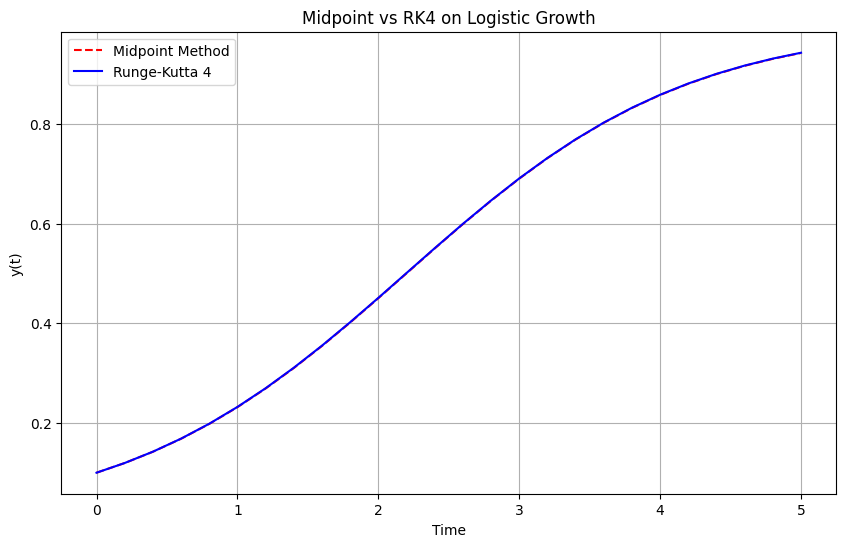

In [5]:
def f(t, y):
    return y * (1 - y)

# parameters
T = 5
h = 0.2
t = np.arange(0, T + h, h)
y0 = 0.1

# initialize results
y_midpoint = [y0]
y_rk4 = [y0]

# Midpoint Method (Modified Euler)
for i in range(len(t) - 1):
    k1 = f(t[i], y_midpoint[-1])
    k2 = f(t[i] + h/2, y_midpoint[-1] + h/2 * k1)
    y_next = y_midpoint[-1] + h * k2
    y_midpoint.append(y_next)

# Runge-Kutta 4 Method
for i in range(len(t) - 1):
    k1 = f(t[i], y_rk4[-1])
    k2 = f(t[i] + h/2, y_rk4[-1] + h/2 * k1)
    k3 = f(t[i] + h/2, y_rk4[-1] + h/2 * k2)
    k4 = f(t[i] + h, y_rk4[-1] + h * k3)
    y_next = y_rk4[-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    y_rk4.append(y_next)

# plot results
plt.figure(figsize=(10, 6))
plt.plot(t, y_midpoint, 'r--', label='Midpoint Method')
plt.plot(t, y_rk4, 'b-', label='Runge-Kutta 4')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Midpoint vs RK4 on Logistic Growth')
plt.legend()
plt.grid(True)
plt.show()